In [2]:
# Convert to WAV
import subprocess
import os

In [7]:
def convert(directory, label):
    """
    Args: directory - directory to loop over
    """
    # you may have to change the paths
    i = 0
    for f in os.listdir(directory):
        subprocess.call(['ffmpeg', '-i', f'./rap_test/raw_audio/{label}/{f}',
               f'./rap_test/raw_audio/{label}/{label}_{i}.wav'])
        
        # removing file
        os.remove(f'./rap_test/raw_audio/{label}/{f}')
        
        i += 1
        
    print('finished!')

In [8]:
fire_path = "./rap_test/raw_audio/fire"
trash_path = "./rap_test/raw_audio/trash"

In [9]:
convert(trash_path, 'trash')
convert(fire_path, 'fire')

finished!
finished!


In [10]:
# Install pyAudioAnalysis dependencies
!pip install numpy matplotlib scipy sklearn hmmlearn simplejson eyed3 pydub


  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 153kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 4.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for hmmlearn ... done
  Stored in directory: /Users/flaviolici/Library/Caches/pip/wheels/9a/a4/ee/917f0de81626b684fd2139ef5df47744c35ebeacc9e950487b
Successfully built hmmlearn
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 1713, done.
remote: Total 1713 (delta 0), reused 0 (delta 0), pack-reused 1713
Receiving objects: 100% (1713/1713), 81.88 MiB | 2.66 MiB/s, done.
Resolving deltas: 100% (1004/1004), done.
Checking connectivity... done.
Checking out files: 100% (176/176), done.
Directory '.' is not installable. File 'setup.py' not found.
You are using pip version 10.0.1, however version 19.0.3 is available.


In [11]:
!pip install pyAudioAnalysis

    100% |████████████████████████████████| 51kB 2.1MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
!python ./helpers/audioAnalysis.py fileChromagram -i rap_test/raw_audio/fire/fire_0.wav

In [49]:
test

['/Users/flaviolici/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.',
 '  from numpy.core.umath_tests import inner1d',
 'Figure(640x480)']

In [3]:
from pyAudioAnalysis import audioAnalysis

/Users/flaviolici/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


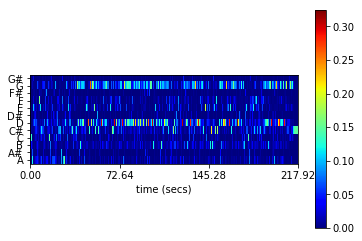

In [4]:
import pylab
audioAnalysis.fileChromagramWrapper("rap_test/raw_audio/fire/fire_0.wav")


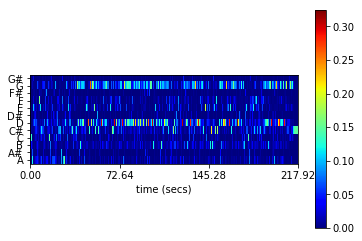

In [64]:
from pyAudioAnalysis import audioFeatureExtraction as aF
from pyAudioAnalysis import audioBasicIO
[fs, x] = audioBasicIO.readAudioFile("rap_test/raw_audio/fire/fire_0.wav")
x = audioBasicIO.stereo2mono(x)
specgram, TimeAxis, FreqAxis = aF.stChromagram(x, fs, round(fs * 0.040),
                                               round(fs * 0.040), True)

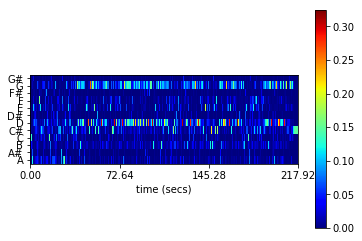

(matrix([[8.05956629e-34, 1.46577709e-34, 3.85134432e-33, ...,
          3.66568536e-33, 2.17547978e-32, 8.25281786e-35],
         [8.05956629e-34, 1.46577709e-34, 3.85134432e-33, ...,
          3.66568536e-33, 2.17547978e-32, 8.25281786e-35],
         [1.39554797e-06, 1.04238073e-06, 7.83553841e-07, ...,
          6.68503620e-07, 4.00341793e-06, 8.39626987e-07],
         ...,
         [5.90524876e-04, 3.76305797e-04, 5.40770959e-04, ...,
          6.54322994e-04, 7.44659405e-04, 5.13979741e-04],
         [3.22509436e-04, 5.23189805e-04, 1.17042380e-03, ...,
          7.16043019e-04, 1.43480581e-03, 5.92434694e-04],
         [2.05665209e-04, 2.06332633e-04, 2.97563488e-04, ...,
          1.66786208e-04, 2.32825245e-03, 4.28024785e-04]]),
 [0.0,
  0.04,
  0.08,
  0.12,
  0.16,
  0.2,
  0.24,
  0.28,
  0.32,
  0.36,
  0.4,
  0.44,
  0.48,
  0.52,
  0.56,
  0.6,
  0.64,
  0.68,
  0.72,
  0.76,
  0.8,
  0.84,
  0.88,
  0.92,
  0.96,
  1.0,
  1.04,
  1.08,
  1.12,
  1.16,
  1.2,
  1.24,
  1

In [65]:
aF.stChromagram(x, fs, round(fs * 0.040),
                                               round(fs * 0.040), True)

In [66]:
import numpy
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def stChromaFeaturesInit(nfft, fs):
   
    freqs = numpy.array([((f + 1) * fs) / (2 * nfft) for f in range(nfft)])    
    Cp = 27.50    
    nChroma = numpy.round(12.0 * numpy.log2(freqs / Cp)).astype(int)

    nFreqsPerChroma = numpy.zeros((nChroma.shape[0], ))

    uChroma = numpy.unique(nChroma)
    for u in uChroma:
        idx = numpy.nonzero(nChroma == u)
        nFreqsPerChroma[idx] = idx[0].shape
    
    return nChroma, nFreqsPerChroma

In [67]:
def stChromaFeatures(X, fs, nChroma, nFreqsPerChroma):

    chromaNames = ['A', 'A#', 'B', 'C', 'C#', 'D', 
                   'D#', 'E', 'F', 'F#', 'G', 'G#']
    spec = X**2    
    if nChroma.max()<nChroma.shape[0]:        
        C = numpy.zeros((nChroma.shape[0],))
        C[nChroma] = spec
        C /= nFreqsPerChroma[nChroma]
    else:        
        I = numpy.nonzero(nChroma>nChroma.shape[0])[0][0]        
        C = numpy.zeros((nChroma.shape[0],))
        C[nChroma[0:I-1]] = spec            
        C /= nFreqsPerChroma
    finalC = numpy.zeros((12, 1))
    newD = int(numpy.ceil(C.shape[0] / 12.0) * 12)
    C2 = numpy.zeros((newD, ))
    C2[0:C.shape[0]] = C
    C2 = C2.reshape(int(C2.shape[0]/12), 12)
    #for i in range(12):
    #    finalC[i] = numpy.sum(C[i:C.shape[0]:12])
    finalC = numpy.matrix(numpy.sum(C2, axis=0)).T
    finalC /= spec.sum()


    return chromaNames, finalC


In [70]:
def stChromagramFlavio(signal, fs, win, step, PLOT=False, path="./"):

    win = int(win)
    step = int(step)
    signal = numpy.double(signal)
    signal = signal / (2.0 ** 15)
    DC = signal.mean()
    MAX = (numpy.abs(signal)).max()
    signal = (signal - DC) / (MAX - DC)

    N = len(signal)        # total number of signals
    cur_p = 0
    count_fr = 0
    nfft = int(win / 2)
    nChroma, nFreqsPerChroma = stChromaFeaturesInit(nfft, fs)
    chromaGram = numpy.array([], dtype=numpy.float64)
    while (cur_p + win - 1 < N):
        count_fr += 1
        x = signal[cur_p:cur_p + win]
        cur_p = cur_p + step
        X = abs(fft(x))
        X = X[0:nfft]
        X = X / len(X)
        chromaNames, C = stChromaFeatures(X, fs, nChroma, nFreqsPerChroma)
        C = C[:, 0]
        if count_fr == 1:
            chromaGram = C.T
        else:
            chromaGram = numpy.vstack((chromaGram, C.T))
    FreqAxis = chromaNames
    TimeAxis = [(t * step) / fs for t in range(chromaGram.shape[0])]

    if (PLOT):
        fig, ax = plt.subplots()
        chromaGramToPlot = chromaGram.transpose()[::-1, :]
        Ratio = int(chromaGramToPlot.shape[1] / (3*chromaGramToPlot.shape[0]))
        if Ratio < 1:
            Ratio = 1
        chromaGramToPlot = numpy.repeat(chromaGramToPlot, Ratio, axis=0)
        imgplot = plt.imshow(chromaGramToPlot)
        fstep = int(nfft / 5.0)
#        FreqTicks = range(0, int(nfft) + fstep, fstep)
#        FreqTicksLabels = [str(fs/2-int((f*fs) / (2*nfft))) for f in FreqTicks]
        ax.set_yticks(range(int(Ratio / 2), len(FreqAxis) * Ratio, Ratio))
        ax.set_yticklabels(FreqAxis[::-1])
        TStep = int(count_fr / 3)
        TimeTicks = range(0, count_fr, TStep)
        TimeTicksLabels = ['%.2f' % (float(t * step) / fs) for t in TimeTicks]
        ax.set_xticks(TimeTicks)
        ax.set_xticklabels(TimeTicksLabels)
        ax.set_xlabel('time (secs)')
        imgplot.set_cmap('jet')
        plt.colorbar()
        plt.savefig(path)   
    

(matrix([[8.05956629e-34, 1.46577709e-34, 3.85134432e-33, ...,
          3.66568536e-33, 2.17547978e-32, 8.25281786e-35],
         [8.05956629e-34, 1.46577709e-34, 3.85134432e-33, ...,
          3.66568536e-33, 2.17547978e-32, 8.25281786e-35],
         [1.39554797e-06, 1.04238073e-06, 7.83553841e-07, ...,
          6.68503620e-07, 4.00341793e-06, 8.39626987e-07],
         ...,
         [5.90524876e-04, 3.76305797e-04, 5.40770959e-04, ...,
          6.54322994e-04, 7.44659405e-04, 5.13979741e-04],
         [3.22509436e-04, 5.23189805e-04, 1.17042380e-03, ...,
          7.16043019e-04, 1.43480581e-03, 5.92434694e-04],
         [2.05665209e-04, 2.06332633e-04, 2.97563488e-04, ...,
          1.66786208e-04, 2.32825245e-03, 4.28024785e-04]]),
 [0.0,
  0.04,
  0.08,
  0.12,
  0.16,
  0.2,
  0.24,
  0.28,
  0.32,
  0.36,
  0.4,
  0.44,
  0.48,
  0.52,
  0.56,
  0.6,
  0.64,
  0.68,
  0.72,
  0.76,
  0.8,
  0.84,
  0.88,
  0.92,
  0.96,
  1.0,
  1.04,
  1.08,
  1.12,
  1.16,
  1.2,
  1.24,
  1

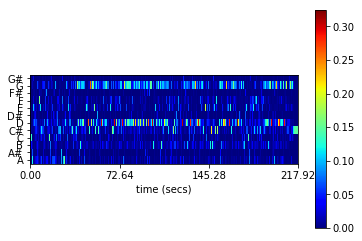

In [71]:
path = "./rap_test/chromagrams/test.png"
stChromagramFlavio(x, fs, round(fs * 0.040),round(fs * 0.040), True, path)

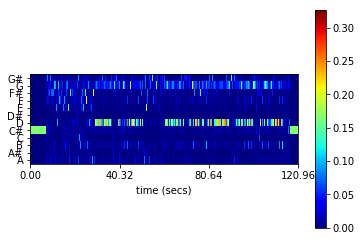

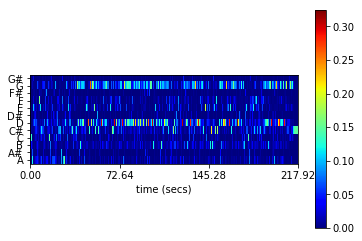

In [84]:
import glob
fire_dir_path = "./rap_test/raw_audio/fire/*.wav"
trash_dir_path = "./rap_test/raw_audio/trash/*.wav"

fire_path = './rap_test/chromagrams/fire/'
trash_path = './rap_test/chromagrams/trash/'

# Get all fire songs

for filename in glob.glob(fire_dir_path):
    [fs, x] = audioBasicIO.readAudioFile(filename)
    x = audioBasicIO.stereo2mono(x)
    path = fire_path + filename.split('/')[-1].replace(".wav",".png")
    stChromagramFlavio(x, fs, round(fs * 0.040),round(fs * 0.040), True, path)
    os.remove(filename)

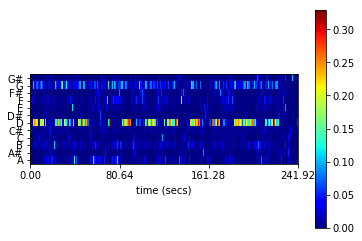

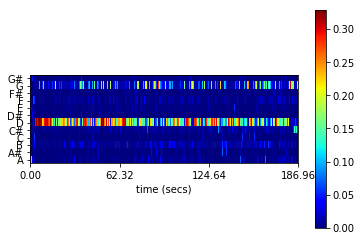

In [85]:
# get all trash songs
for filename in glob.glob(trash_dir_path):
    [fs, x] = audioBasicIO.readAudioFile(filename)
    x = audioBasicIO.stereo2mono(x)
    path = trash_path + filename.split('/')[-1].replace(".wav",".png")
    stChromagramFlavio(x, fs, round(fs * 0.040),round(fs * 0.040), True, path)
    os.remove(filename)